In [71]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

In [72]:
# load breast cancer data
df = (pd.read_csv('.\\Breast_Cancer.csv')
        .clean_names()
        .dropna())

In [73]:
# Check if there are missing values
df.isnull().sum()

age                       0
race                      0
marital_status            0
t_stage_                  0
n_stage                   0
6th_stage                 0
differentiate             0
grade                     0
a_stage                   0
tumor_size                0
estrogen_status           0
progesterone_status       0
regional_node_examined    0
reginol_node_positive     0
survival_months           0
status                    0
dtype: int64

In [74]:
print(df.columns.tolist())

['age', 'race', 'marital_status', 't_stage_', 'n_stage', '6th_stage', 'differentiate', 'grade', 'a_stage', 'tumor_size', 'estrogen_status', 'progesterone_status', 'regional_node_examined', 'reginol_node_positive', 'survival_months', 'status']


The average age of women in this dataset is ~54 years old. Breast cancer patients tend to be in older age groups but it is not 
uncommon to see women with breast cancer in their late 30s or 40s as we see in this dataset.

Age Statistics
count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: age, dtype: float64


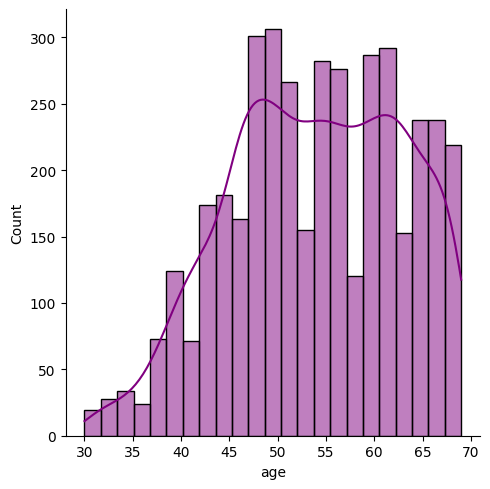

In [75]:
# Histogram of ages
sns.displot(data=df, x="age", kind="hist", kde = True, color="purple")
print("Age Statistics")
print(df["age"].describe())


<AxesSubplot: xlabel='age'>

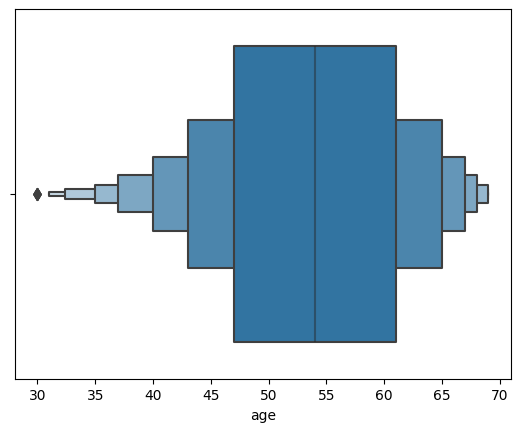

In [76]:
# Boxenplot of ages
sns.boxenplot(data=df, x="age")

In [77]:
# initial subsetted dataframe by n-stage and status
df_status = df.groupby(by=["n_stage", "status"])["status"].count().unstack()
print(df_status)

status   Alive  Dead
n_stage             
N1        2462   270
N2         655   165
N3         291   181


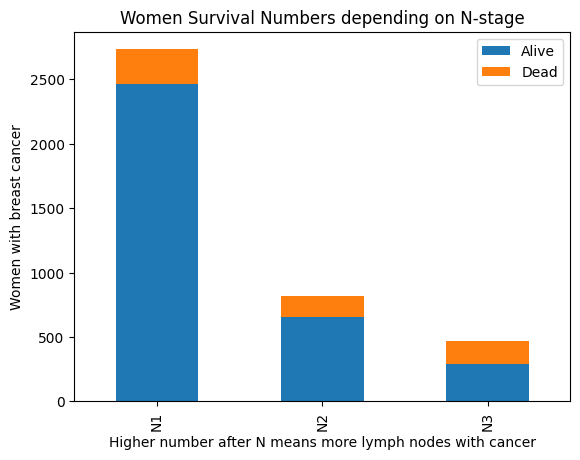

In [78]:
# build plot
labels = ['n1', 'n2', 'n3']
xlab = 'Higher number after N means more lymph nodes with cancer'
ylab = 'Women with breast cancer'


df_status.plot(kind="bar", stacked ='True')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend(['Alive', 'Dead'])
plt.title('Women Survival Numbers depending on N-stage')
plt.show()

We see that women that have more lymph nodes affected by cancer (Stage N3) are passing away at a greater rate compared
to those with less lymph nodes affected (Stage N2 and N1)

status   percent_alive  percent_dead
n_stage                             
N1                90.1           9.9
N2                79.9          20.1
N3                61.7          38.3


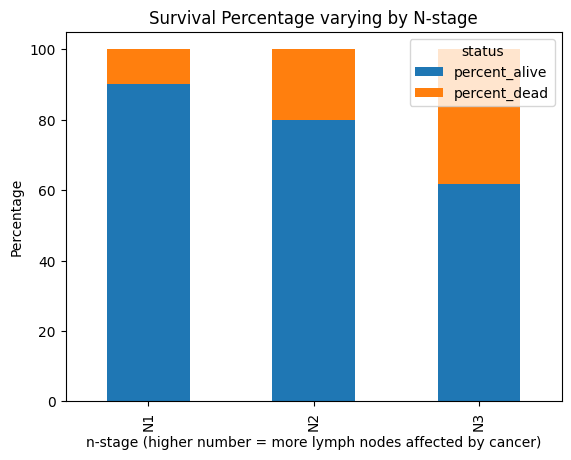

In [79]:
# Stacked Bar Percentage Visualization n-stage vs survival
df_status["percent_alive"] = round(df_status["Alive"] / df_status.iloc[:,0:2].sum(axis=1) * 100, 1)
df_status["percent_dead"] = round(df_status["Dead"] / df_status.iloc[:,0:2].sum(axis=1) * 100, 1)

print(df_status[["percent_alive", "percent_dead"]])
df_status[["percent_alive", "percent_dead"]].plot(
  kind ='bar',
  stacked=True,
  title = "Survival Percentage varying by N-stage")

plt.xlabel('n-stage (higher number = more lymph nodes affected by cancer)')
plt.ylabel('Percentage')
plt.show()

The higher the T stage the bigger the tumor size. We see a negative relationship between tumor size and survival rate./.

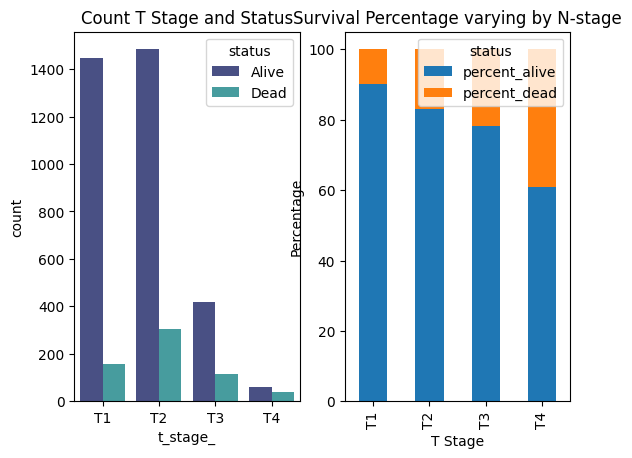

In [80]:
# intial t-stage dataframe calculations
df_tstage = df.groupby(by=["t_stage_", "status"])["status"].count().unstack()
df_tstage["percent_alive"] = round(df_tstage["Alive"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_tstage["percent_dead"] = round(df_tstage["Dead"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)

# countplot of t-stage 
f, axes = plt.subplots(1, 2)
sns.countplot(data=df, x="t_stage_", hue="status", palette="mako", ax=axes[0]).set(title="Count T Stage and Status")

# percentage bar plot
df_tstage[["percent_alive", "percent_dead"]].plot(
  kind ='bar',
  stacked=True,
  ax=axes[1],
  title = "Survival Percentage varying by N-stage")

plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.show()

IIBB and IIB are earlier stages of breast cancer while IIA, IIAA and IIIC are later stages of breast cancer
where IIIC is the latest stage. IIIC patients have tumors spread to 10 or more lymph nodes. As expected a significant portion
of patients at the IIIC stage did not make it. The survival rate for IIB, IIIB, IIA, IIIA is higher.

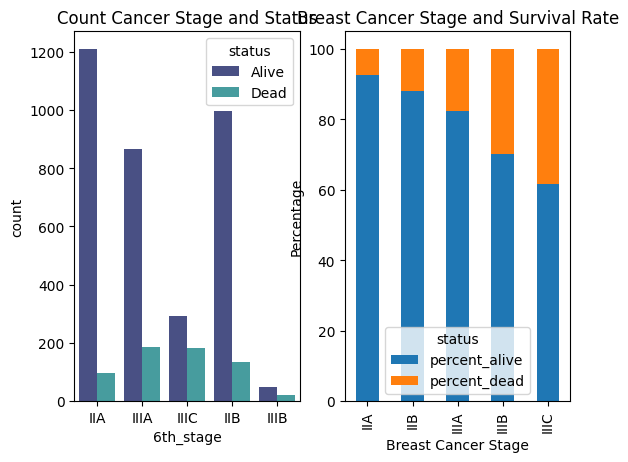

In [81]:
# intial 6-stage dataframe calculations
df_6stage = df.groupby(by=["6th_stage", "status"])["status"].count().unstack()
df_6stage["percent_alive"] = round(df_6stage["Alive"] / df_6stage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_6stage["percent_dead"] = round(df_6stage["Dead"] / df_6stage.iloc[:,0:2].sum(axis=1) * 100, 1)

f, axes = plt.subplots(1, 2)
sns.countplot(data=df, x="6th_stage", hue="status", ax=axes[0], palette="mako").set(title="Count Cancer Stage and Status")

df_6stage[["percent_alive", "percent_dead"]].plot(
    kind="bar",
    ax=axes[1],
    title="Breast Cancer Stage and Survival Rate",
    stacked=True,
    xlabel="Breast Cancer Stage",
    ylabel="Percentage"
)
plt.show()

Initial Correlation Data:

                             age  tumor_size  regional_node_examined  \
age                     1.000000   -0.077215               -0.033345   
tumor_size             -0.077215    1.000000                0.104352   
regional_node_examined -0.033345    0.104352                1.000000   
reginol_node_positive   0.012586    0.242322                0.411580   
survival_months        -0.009390   -0.086901               -0.022054   

                        reginol_node_positive  survival_months  
age                                  0.012586        -0.009390  
tumor_size                           0.242322        -0.086901  
regional_node_examined               0.411580        -0.022054  
reginol_node_positive                1.000000        -0.135214  
survival_months                     -0.135214         1.000000  


C:\Users\chris\AppData\Local\Temp\ipykernel_6048\958568330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\chris\AppData\Local\Temp\ipykernel_6048\958568330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='rocket')


<AxesSubplot: >

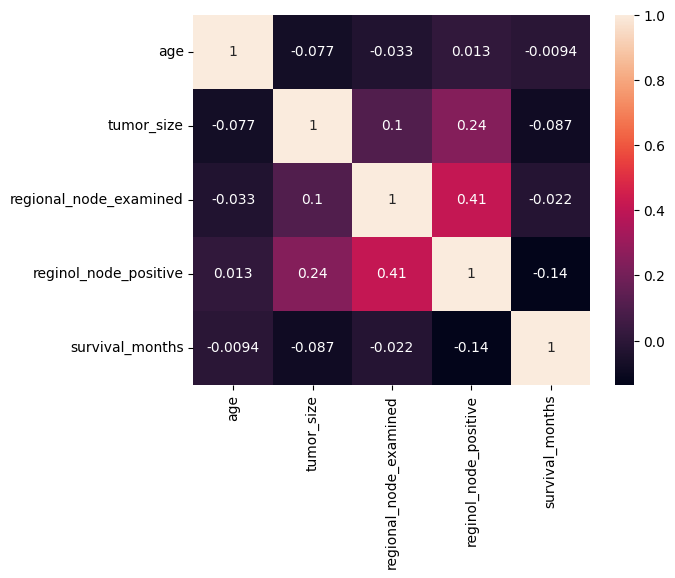

In [82]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='rocket')

Married women have slightly better rates of survival than single, divorced, and widowed women. There is some relationship 
between having a significant other (family/husband) than not having one, but more data and variables are need to prove
this.

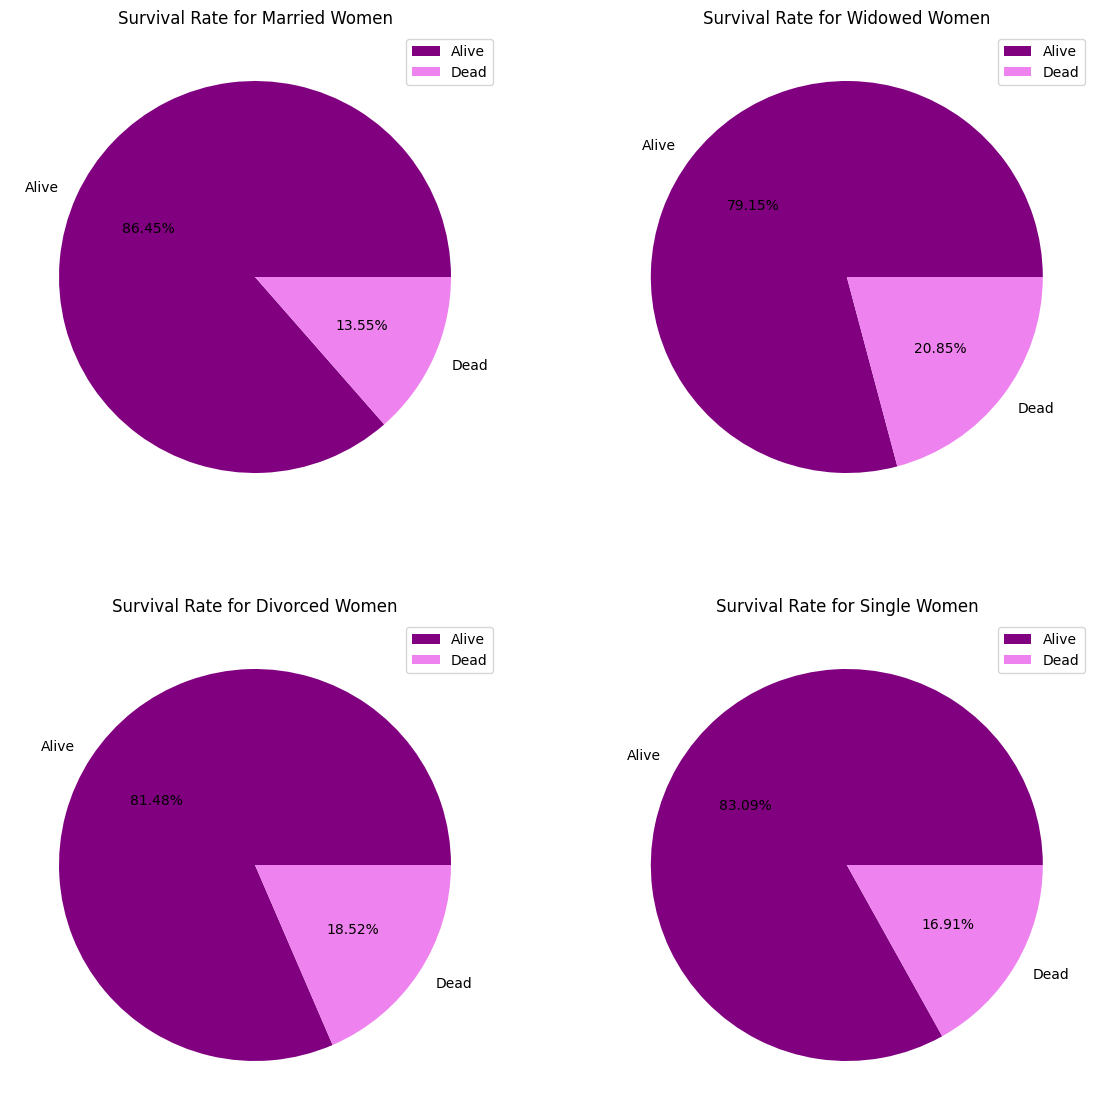

In [102]:
df_married = df.loc[df["marital_status"] == "Married", ["marital_status", "status"]].groupby(by=["status"]).count()
df_divorced = df.loc[df["marital_status"] == "Divorced", ["marital_status", "status"]].groupby(by=["status"]).count()
df_widow = df.loc[df["marital_status"] == "Widowed", ["marital_status", "status"]].groupby(by=["status"]).count()
df_single = df.loc[df["marital_status"] == "Single ", ["marital_status", "status"]].groupby(by=["status"]).count()

fpie, axes = plt.subplots(2, 2, figsize=(14,14))

df_married.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[0, 0],
    colors = ['purple', 'violet'],
    ylabel = '',
    title = 'Survival Rate for Married Women')

df_divorced.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[1,0],
    colors = ['purple', 'violet'],
    ylabel = '',
    title = 'Survival Rate for Divorced Women')

df_widow.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[0, 1],
    colors = ['purple', 'violet'],
    ylabel = '',
    title = 'Survival Rate for Widowed Women')

df_single.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[1, 1],
    colors = ['purple', 'violet'],
    ylabel = '',
    title = 'Survival Rate for Single Women')

plt.show()

Those who passed away had on average larger tumor sizes with higher 25% and 75% percentiles.

count    3408.000000
mean       29.268779
std        20.303175
min         1.000000
25%        15.000000
50%        23.000000
75%        35.000000
max       140.000000
Name: tumor_size, dtype: float64

count    616.000000
mean      37.139610
std       24.116115
min        1.000000
25%       20.000000
50%       30.000000
75%       50.000000
max      140.000000
Name: tumor_size, dtype: float64


<AxesSubplot: xlabel='tumor_size', ylabel='status'>

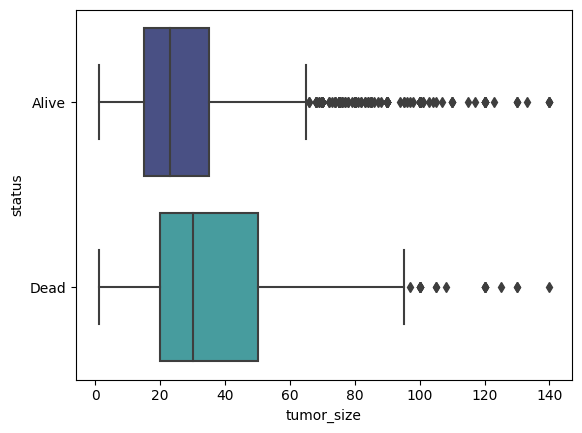

In [121]:
print(df.loc[df["status"] == "Alive"]["tumor_size"].describe())
print()
print(df.loc[df["status"] == "Dead"]["tumor_size"].describe())

sns.boxplot(x=df["tumor_size"], y=df["status"], palette="mako")

                             age      race  marital_status  t_stage_  \
age                     1.000000  0.079734        0.050832 -0.066914   
race                    0.079734  1.000000       -0.111417  0.001082   
marital_status          0.050832 -0.111417        1.000000  0.009318   
t_stage_               -0.066914  0.001082        0.009318  1.000000   
n_stage                 0.002883 -0.032125        0.013168  0.277015   
6th_stage              -0.018741 -0.025282        0.002989  0.606711   
differentiate           0.015697 -0.018759        0.031639 -0.031355   
grade                  -0.093216 -0.057032       -0.004283  0.110220   
a_stage                 0.020860  0.007005        0.004936 -0.221124   
tumor_size             -0.077215 -0.004082        0.007407  0.809176   
estrogen_status         0.059787  0.057652       -0.017895 -0.060954   
progesterone_status    -0.021269  0.034351       -0.013485 -0.057633   
regional_node_examined -0.033345 -0.004778       -0.004285  0.11

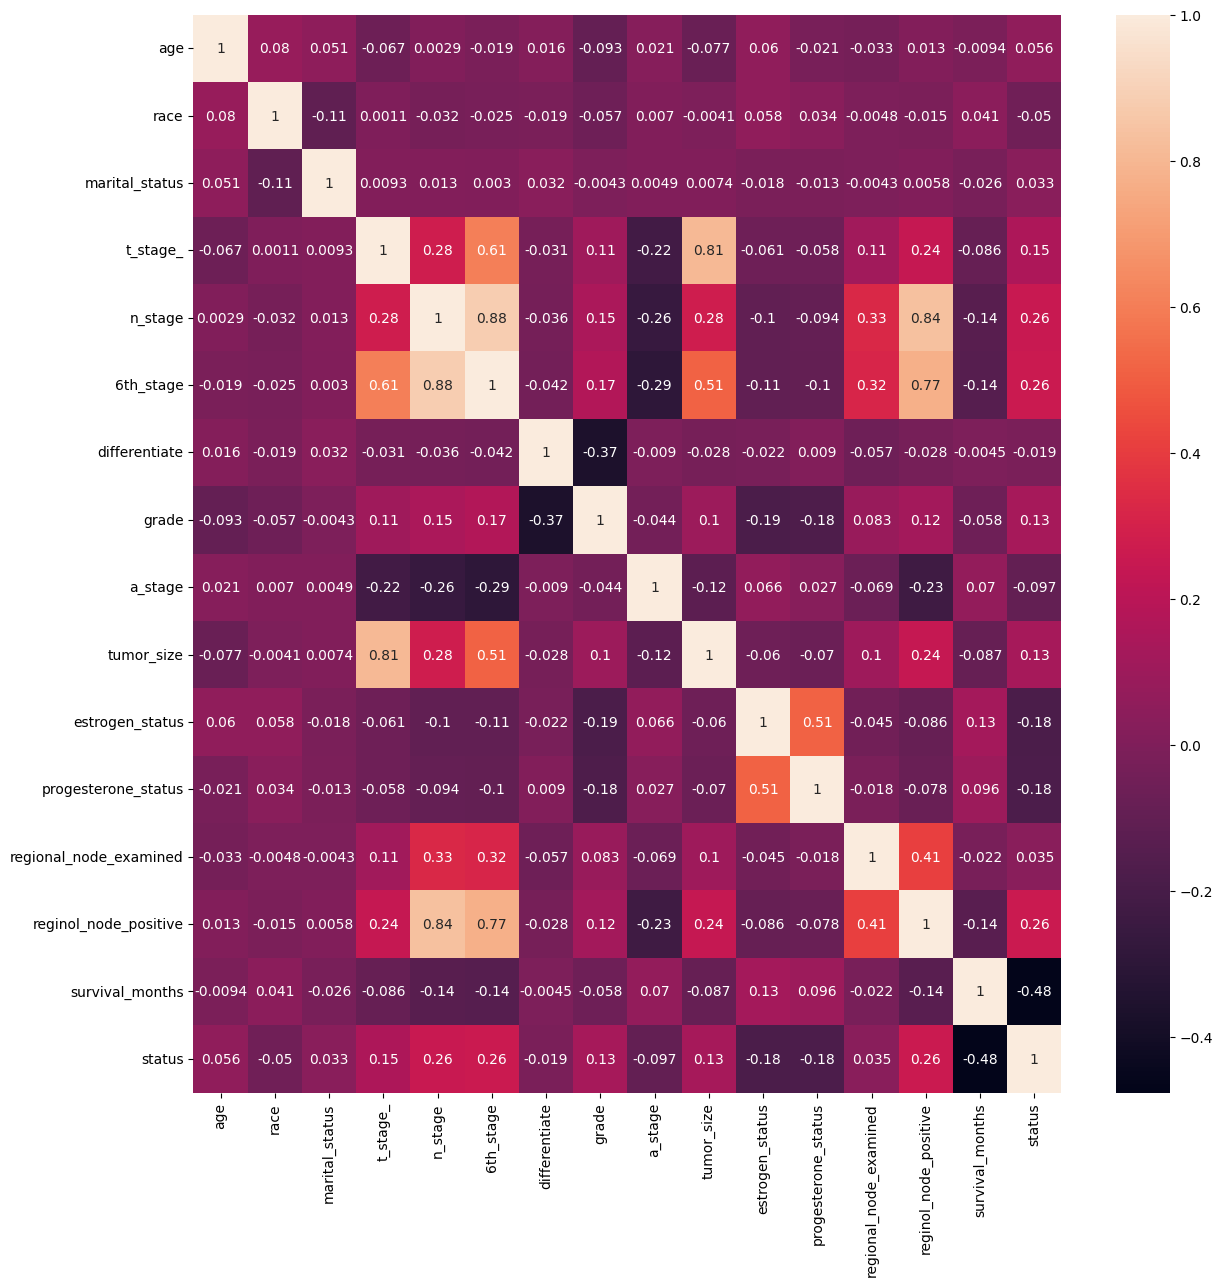

In [152]:
from sklearn.preprocessing import LabelEncoder

# array of categorical variables
categories = df.select_dtypes(include='object').columns

# Convert categorical variables to dummy variables in original df
df[categories] = df[categories].apply(LabelEncoder().fit_transform)

# print correlation numbers
print(df.corr())

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.show()

Question: Does cancer stage serve as a good predictor of tumor size?

Answer: Despite categorical variables (n_stage, t_stage, and 6th stage) being correlated to tumor size compared to other 
variables. It is still not the best combination of regressors to predict tumor size. There may be other variables or 
the phenomena of the cancer cells themselves that could contribute to tumor size, but further data and research i
needed. 

In [157]:
from sklearn.linear_model import LinearRegression

response = "tumor_size"
regressors = ["n_stage", "t_stage_", "6th_stage"]

X = df[regressors]
y = df[response]

lm = LinearRegression()

lm.fit(X, y)

print("R2 =", lm.score(X, y))
pd.DataFrame(lm.coef_.reshape(1,-1), columns=X.columns)


R2 = 0.6621813184631546


,n_stage,t_stage_,6th_stage
0,7.222779,24.38537,-3.859252
